In [1]:
!pip install stim~=1.14
!pip install numpy~=1.0  # 1.0 instead of 2.0 for pymatching compatibility later
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.5 MB/s eta 0:00:00a 0:00:010m


In [2]:
import stim
print(stim.__version__)

1.14.0


In [9]:
circuit = stim.Circuit()

# First, the circuit will initialize a Bell pair.
circuit.append("H", [0])
circuit.append("CNOT", [0, 1])

# Then, the circuit will measure both qubits of the Bell pair in the Z basis.
circuit.append("M", [0, 1])

In [10]:
circuit.diagram()

q0: -H-@-@-M:rec[0]-
       | |
q1: ---X-|-M:rec[1]-
         |
q2: -----X----------

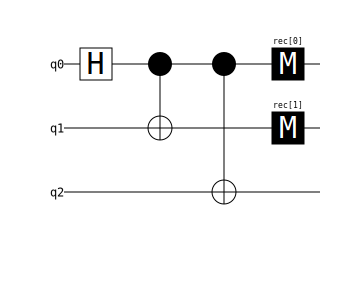

In [11]:
circuit.diagram('timeline-svg')

In [6]:
sampler = circuit.compile_sampler()
print(sampler.sample(shots=10))

[[ True  True]
 [False False]
 [ True  True]
 [False False]
 [ True  True]
 [False False]
 [ True  True]
 [False False]
 [ True  True]
 [False False]]


In [7]:
# Indicate the two previous measurements are supposed to consistently agree.
circuit.append("DETECTOR", [stim.target_rec(-1), stim.target_rec(-2)])
print(repr(circuit))

stim.Circuit('''
    H 0
    CX 0 1
    M 0 1
    DETECTOR rec[-1] rec[-2]
''')


In [8]:
sampler = circuit.compile_detector_sampler()
print(sampler.sample(shots=5))

[[False]
 [False]
 [False]
 [False]
 [False]]


In [12]:
circuit.to_crumble_url()

'https://algassert.com/crumble#circuit=H_0;CX_0_1_0_2;M_0_1'

## Trying to create circuit from tableau based on stabilizer generators

In [14]:
# 5-qubit code from generators:
stim.Tableau.from_stabilizers([
    stim.PauliString("XZZXI"),
    stim.PauliString("IXZZX"),
    stim.PauliString("XIXZZ"),
    stim.PauliString("ZXIXZ")
], allow_redundant=True, allow_underconstrained=True)

stim.Tableau.from_conjugated_generators(
    xs=[
        stim.PauliString("-__X_Z"),
        stim.PauliString("+____Z"),
        stim.PauliString("-Z_X_Z"),
        stim.PauliString("+_Z__Z"),
        stim.PauliString("-Z_XX_"),
    ],
    zs=[
        stim.PauliString("+XZZX_"),
        stim.PauliString("+_XZZX"),
        stim.PauliString("+X_XZZ"),
        stim.PauliString("+ZX_XZ"),
        stim.PauliString("-_ZXZ_"),
    ],
)

In [0]:
# EPR pair:
circuit1 = stim.Circuit()
circuit1.append("H", 0)
# circuit1.append("H", 0)
circuit1.append("CNOT", [0,1])
# circuit1.append("CNOT", [0,1])
stim.Tableau.from_circuit(circuit1)

In [39]:
#create tesseract subsystem color code (http://arxiv.org/abs/2409.04628) from stabilizer generators:
tesseract_code = stim.Tableau.from_stabilizers([
    stim.PauliString("XXXXXXXXIIIIIIII"), #rows 1-2
    stim.PauliString("IIIIXXXXXXXXIIII"), #rows 2-3
    stim.PauliString("IIIIIIIIXXXXXXXX"), #rows 3-4
    stim.PauliString("ZZZZZZZZIIIIIIII"), #rows 1-2
    stim.PauliString("IIIIZZZZZZZZIIII"), #rows 2-3
    stim.PauliString("IIIIIIIIZZZZZZZZ"), #rows 3-4
    stim.PauliString("XXIIXXIIXXIIXXII"), #columns 1-2
    stim.PauliString("ZZIIZZIIZZIIZZII"), #columns 1-2
    stim.PauliString("IXXIIXXIIXXIIXXI"), #columns 2-3
    stim.PauliString("IZZIIZZIIZZIIZZI"), #columns 2-3
], allow_redundant=False, allow_underconstrained=True)

In [28]:
# Here there's an explanation of how to create an encoded state using the generators. Note that this code projects some state into the codestate, which doesn't guarantee we actually end up in the code-space. That is, it doesn't guarantee we end up in the +1 eigenspace of each generator, and indeed we can end up in the -1 eigenspace of some of them. However, the fault-tolerance properties still hold, and all we have to do is compare future measurement to the previous measurements instead of to +1 and we should be fine

circuit = stim.Circuit("""
    MPP X0*X1*X2*X3*X4*X5*X6*X7
    MPP X4*X5*X6*X7*X8*X9*X10*X11
    MPP X8*X9*X10*X11*X12*X13*X14*X15
    MPP X0*X1*X4*X5*X8*X9*X12*X13
    MPP X1*X2*X5*X6*X9*X10*X13*X14
    MPP Z0*Z1*Z2*Z3*Z4*Z5*Z6*Z7
    MPP Z4*Z5*Z6*Z7*Z8*Z9*Z10*Z11
    MPP Z8*Z9*Z10*Z11*Z12*Z13*Z14*Z15
    MPP Z0*Z1*Z4*Z5*Z8*Z9*Z12*Z13
    MPP Z1*Z2*Z5*Z6*Z9*Z10*Z13*Z14
""")

# Adding qubit coordinates metadata
circuit.append_operation("QUBIT_COORDS", [0], [0, 0])
circuit.append_operation("QUBIT_COORDS", [1], [1, 0])
circuit.append_operation("QUBIT_COORDS", [2], [2, 0])
circuit.append_operation("QUBIT_COORDS", [3], [3, 0])
circuit.append_operation("QUBIT_COORDS", [4], [0, 1])
circuit.append_operation("QUBIT_COORDS", [5], [1, 1])
circuit.append_operation("QUBIT_COORDS", [6], [2, 1])
circuit.append_operation("QUBIT_COORDS", [7], [3, 1])
circuit.append_operation("QUBIT_COORDS", [8], [0, 2])
circuit.append_operation("QUBIT_COORDS", [9], [1, 2])
circuit.append_operation("QUBIT_COORDS", [10], [2, 2])
circuit.append_operation("QUBIT_COORDS", [11], [3, 2])
circuit.append_operation("QUBIT_COORDS", [12], [0, 3])
circuit.append_operation("QUBIT_COORDS", [13], [1, 3])
circuit.append_operation("QUBIT_COORDS", [14], [2, 3])
circuit.append_operation("QUBIT_COORDS", [15], [3, 3])

circuit.append("TICK")
# Add the error correction procedure by measuring the stabilizers again
circuit += stim.Circuit("""
    # Measure the stabilizers (same as encoding step)
    MPP X0*X1*X2*X3*X4*X5*X6*X7
    DETECTOR rec[-10] rec[-20]
    MPP X4*X5*X6*X7*X8*X9*X10*X11
    DETECTOR rec[-9] rec[-19]
    MPP X8*X9*X10*X11*X12*X13*X14*X15
    DETECTOR rec[-8] rec[-18]
    MPP X0*X1*X4*X5*X8*X9*X12*X13
    DETECTOR rec[-7] rec[-17]
    MPP X1*X2*X5*X6*X9*X10*X13*X14
    DETECTOR rec[-6] rec[-16]

    MPP Z0*Z1*Z2*Z3*Z4*Z5*Z6*Z7
    DETECTOR rec[-5] rec[-15]
    MPP Z4*Z5*Z6*Z7*Z8*Z9*Z10*Z11
    DETECTOR rec[-4] rec[-14]
    MPP Z8*Z9*Z10*Z11*Z12*Z13*Z14*Z15
    DETECTOR rec[-3] rec[-13]
    MPP Z0*Z1*Z4*Z5*Z8*Z9*Z12*Z13
    DETECTOR rec[-2] rec[-12]
    MPP Z1*Z2*Z5*Z6*Z9*Z10*Z13*Z14
    DETECTOR rec[-1] rec[-11]
""")

circuit.diagram()

/---------------------------------------------------------------------------------------------------------------------------------------------------------------\ /---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\
 q0: -MPP[X]:rec[0]-----------------------------MPP[X]:rec[3]---------------MPP[Z]:rec[5]-----------------------------MPP[Z]:rec[8]-QUBIT_COORDS(0,0)-------------------MPP[X]:rec[10]-DETECTOR:D0=rec[3]*rec[18446744073709551609]-DETECTOR:D1=rec[5]*rec[18446744073709551611]-MPP[X]:rec[13]-DETECTOR:D2=rec[7]*rec[18446744073709551613]-DETECTOR:D3=rec[9]*rec[18446744073709551615]-MPP[Z]:rec[15]----------------------------DETECTOR:D5=rec[13]*rec[3]-DETECTOR:D6=rec[15]*rec[5]-MPP[Z]:rec[18]----------------------------------------------------------------------
      |                                         |                           |                                         |                                                 |                                                                                                        |                                                                                                        |                                                                                               |
 q1: -MPP[X]:rec[0]-----------------------------MPP[X]:rec[3]-MPP[X]:rec[4]-MPP[Z]:rec[5]-----------------------------MPP[Z]:rec[8]-MPP[Z]:rec[9]-----QUBIT_COORDS(1,0)-MPP[X]:rec[10]-------------------------------------------------------------------------------------------MPP[X]:rec[13]-MPP[X]:rec[14]----------------------------------------------------------------------------MPP[Z]:rec[15]----------------------------------------------------------------------------------MPP[Z]:rec[18]----------------------------MPP[Z]:rec[19]-DETECTOR:D8=rec[19]*rec[9]-
      |                                         |             |             |                                         |             |                                   |                                                                                                        |              |                                                                                         |                                                                                               |                                         |
 q2: -MPP[X]:rec[0]-----------------------------|-------------MPP[X]:rec[4]-MPP[Z]:rec[5]-----------------------------|-------------MPP[Z]:rec[9]-----QUBIT_COORDS(2,0)-MPP[X]:rec[10]-------------------------------------------------------------------------------------------|--------------MPP[X]:rec[14]----------------------------------------------------------------------------MPP[Z]:rec[15]----------------------------------------------------------------------------------|-----------------------------------------MPP[Z]:rec[19]----------------------------
      |                                         |             |             |                                         |             |                                   |                                                                                                        |              |                                                                                         |                                                                                               |                                         |
 q3: -MPP[X]:rec[0]-----------------------------|-------------|-------------MPP[Z]:rec[5]-----------------------------|-------------|-----------------QUBIT_COORDS(3,0)-MPP[X]:rec[10]-----------------------------------------------------------------------------

In [25]:

circuit.to_crumble_url()

'https://algassert.com/crumble#circuit=MPP_X0*X1*X2*X3*X4*X5*X6*X7_X4*X5*X6*X7*X8*X9*X10*X11_X8*X9*X10*X11*X12*X13*X14*X15_X0*X1*X4*X5*X8*X9*X12*X13_X1*X2*X5*X6*X9*X10*X13*X14_Z0*Z1*Z2*Z3*Z4*Z5*Z6*Z7_Z4*Z5*Z6*Z7*Z8*Z9*Z10*Z11_Z8*Z9*Z10*Z11*Z12*Z13*Z14*Z15_Z0*Z1*Z4*Z5*Z8*Z9*Z12*Z13_Z1*Z2*Z5*Z6*Z9*Z10*Z13*Z14;Q(0,0)0;Q(1,0)1;Q(2,0)2;Q(3,0)3;Q(0,1)4;Q(1,1)5;Q(2,1)6;Q(3,1)7;Q(0,2)8;Q(1,2)9;Q(2,2)10;Q(3,2)11;Q(0,3)12;Q(1,3)13;Q(2,3)14;Q(3,3)15;TICK;MPP_X0*X1*X2*X3*X4*X5*X6*X7;DT_rec[-10]_rec[-20];MPP_X4*X5*X6*X7*X8*X9*X10*X11;DT_rec[-9]_rec[-19];MPP_X8*X9*X10*X11*X12*X13*X14*X15;DT_rec[-8]_rec[-18];MPP_X0*X1*X4*X5*X8*X9*X12*X13;DT_rec[-7]_rec[-17];MPP_X1*X2*X5*X6*X9*X10*X13*X14;DT_rec[-6]_rec[-16];MPP_Z0*Z1*Z2*Z3*Z4*Z5*Z6*Z7;DT_rec[-5]_rec[-15];MPP_Z4*Z5*Z6*Z7*Z8*Z9*Z10*Z11;DT_rec[-4]_rec[-14];MPP_Z8*Z9*Z10*Z11*Z12*Z13*Z14*Z15;DT_rec[-3]_rec[-13];MPP_Z0*Z1*Z4*Z5*Z8*Z9*Z12*Z13;DT_rec[-2]_rec[-12];MPP_Z1*Z2*Z5*Z6*Z9*Z10*Z13*Z14;DT_rec[-1]_rec[-11]'

In [26]:
sampler = circuit.compile_sampler()
print(sampler.sample(shots=10))

[[ True  True  True False  True False False False False False  True  True
   True False  True False False False False False]
 [False  True  True  True False False False False False False False  True
   True  True False False False False False False]
 [ True  True  True False False False False False False False  True  True
   True False False False False False False False]
 [ True False False False  True False False False False False  True False
  False False  True False False False False False]
 [ True  True False  True  True False False False False False  True  True
  False  True  True False False False False False]
 [ True  True  True False False False False False False False  True  True
   True False False False False False False False]
 [ True  True  True  True False False False False False False  True  True
   True  True False False False False False False]
 [ True  True False  True False False False False False False  True  True
  False  True False False False False False False]


In [29]:
sampler = circuit.compile_detector_sampler()
print(sampler.sample(shots=5))

IndexError: Referred to a measurement record before the beginning of time.

In [40]:
tesseract_circuit = tesseract_code.to_circuit()

In [41]:
tesseract_circuit.to_crumble_url()

'https://algassert.com/crumble#circuit=CX_6_0_0_6_6_0;H_0_1_8;CX_0_1_0_3_0_7_0_8_0_11_0_12_0_14;H_6;CX_6_0_6_1_1_6_6_1;H_2;CX_1_2_1_6_1_9_1_12_1_13_1_14_1_15_8_1_9_2_2_9_9_2_2_3_7_2_8_2_10_2_12_2_14_2_4_3_5_3_7_3_10_3_13_3_15_3_6_4_4_6_6_4_4_6_4_8_4_9_4_10_4_12_4_15_7_5_5_7_7_5_5_6_7_5_8_5_10_5_11_5_14_5_15_5_8_6_6_8_8_6_6_10_6_13_6_14_8_7_7_8_8_7_10_7_11_7_12_7_13_7_9_8_8_9_9_8_8_9_8_10_8_11_8_12_8_13_8_14_8_15_10_9_11_9_12_9_13_9_14_9_15_9'